# Bank Churn Analysis

## Problem Statement
The high rate of customers leaving banks (churn rate) suggests deficiencies in several areas, including customer experience, operational efficiency, and the competitiveness of products and features. This necessitates a focus on understanding and managing customer churn to improve overall customer satisfaction and achieve sustainable growth.

## Objective
If a customer churns, it means they left the bank and took their business elsewhere. If you can predict which customers are likely to churn, you can take measures to retain them before they do.

**Imports**

In [4]:
# For data manipulation
import numpy as np
import pandas as pd

In [5]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [6]:
# Load dataset into a dataframe
# df = pd.read_csv('', index_col = 0) | use this to remove index column
df = pd.read_csv('Churn_Modelling.csv')


# Display first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Discovery

In [26]:
# import package
from ydata_profiling import ProfileReport

# To generate the standard profiling report, merely run:
profile = ProfileReport(df, title="Profiling Report")

# displaying the report as a set of widgets. In a Jupyter Notebook, run:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\tunhi\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Female'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# How large the dataset is. Total values across the whole data
print(df.size)

# Gather basic information about the data
df.info()

140000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Dataset contains 14 variables and 10000 rows, totaling 140,000 values. 
- Each row represents a bank customer and the columns stores the customer's bank information
- There are 7 Numeric variables: RowNumber, CustomerId ,CreditScore, Age, Tenure, Balance, ,Estimated Salary   
- There are 6 categorical variables: Gender, Geography, NumOfProducts, HasCrCard, IsActiveMember, Exited. 
- There is 1 text variable: Surname

**Quick Stats**

In [14]:
def describe(df):
    df = df.drop(['Surname','Geography','Gender'], axis=1)  #drop categorical variables
    return pd.concat([df.describe().T,
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt')
                     ], axis=1).T

describe(df)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000
skew,0.00000,1.149146e-03,-0.071607,1.011320,0.010991,-0.141109,0.745568,-0.901812,-0.060437,0.002085,1.471611
kurt,-1.20000,-1.196113e+00,-0.425726,1.395347,-1.165225,-1.489412,0.582981,-1.186973,-1.996747,-1.181518,0.165671


- `Credit Score` ranges from 350 - 850 with a slight skew to the left
- Customers `age` ranges from 18 - 92 and averages around 38 years old. 
- On average, customers `tenure` is around 5 years 
- On average, the customers' account `balance` ranges from $0 to $250K.
- Customers' `estimated salary` ranges from $11.58 to $199K


## Data Preprocessing

**Drop variables**
- The `CustomerId` and `Surname` variable has sensitive customer data and should be removed to maintain confidentally. 
- `RowNumber` can also be removed has it is just a counter. 

In [15]:
df1 = df.drop(['CustomerId','Surname','RowNumber'],axis=1)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Rename 'Exited' to 'Churned'**


In [19]:
df1 = df1.rename(columns={'Exited': 'Churned'})
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check for missing values**

In [21]:
print('Missing values per column:')
df1.isna().sum()

Missing values per column:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64

**Check for duplicates**

In [22]:
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

df_row = len(df)
df_row_no_dupe = len(df.drop_duplicates())
df_row_dupe = df_row - df_row_no_dupe

print('No. of rows with duplicates :', df_row_dupe)

Shape of dataframe: (10000, 14)
Shape of dataframe with duplicates dropped: (10000, 14)
No. of rows with duplicates : 0


**Check for outliers**

In [23]:
df1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churned'],
      dtype='object')

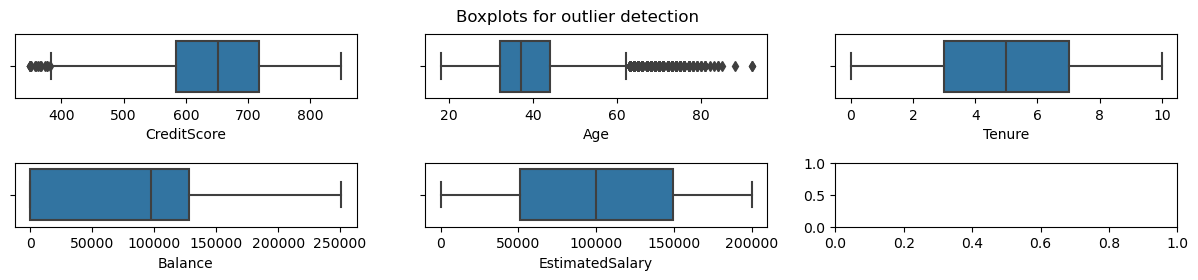

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# create 2 row x 3 column figure
fig, axes = plt.subplots(2, 3, figsize=(15, 2.5))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=df1['CreditScore'])
sns.boxplot(ax=axes[0,1], x=df1['Age'])
sns.boxplot(ax=axes[0,2], x=df1['Tenure'])

plt.subplots_adjust(hspace=1) 

sns.boxplot(ax=axes[1,0], x=df['Balance'])
sns.boxplot(ax=axes[1,1], x=df['EstimatedSalary'])
plt.show();

- `CreditScore` has some outliers for scores under 400
-  Customers over `Age` 60 are outliers. 

## Data Analysis

**Target Variable = `Churned`**

**Class Imbalance**

In [37]:
# Get count of distinct values
df1['Churned'].value_counts(normalize=True)*100

Churned
0    79.63
1    20.37
Name: proportion, dtype: float64

- Of 10,000 customers, at least 20% of the customers have churned
- Since `Churned` is Categorical, check Class Imbalance
- When predicting a categorical target, problems can arise when the class distribution is highly imbalanced. 
- `Churned`is split ~80-20 which is imbalance but is still fine.

## Univarate Analysis

**Find distnct values for categorical variables**

In [ ]:
# Separate numerical and categorical variables into different df
df['Gender'].value_counts(normalize=True)


Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

There's almost an even split between male and female customers with male making up 54% of the customers. 

In [ ]:
# Separate numerical and categorical variables into different df
df['Geography'].value_counts()


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Customers are from 3 countries: France, Germany, and Spain. Over half are customers from France and the rest are split almost evenly between Germany and Spain

In [ ]:
# Separate numerical and categorical variables into different df
df['NumOfProducts'].value_counts()


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

There are up to 4 number of products a customer can hold. The majority of customers have only 1-2 products and very few has 3-4 products.

In [ ]:
# Separate numerical and categorical variables into different df
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

70% of the customers have a credit card

In [ ]:
# Separate numerical and categorical variables into different df
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

About half of the customers are active and half are inactive

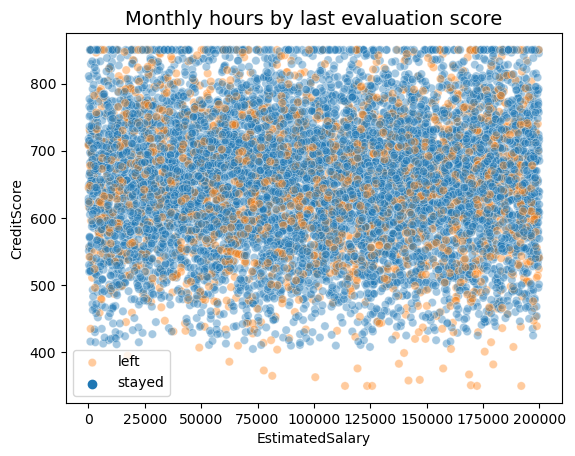

In [32]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
# plt.figure(figsize=(1600, 500))
sns.scatterplot(data=df1, x='EstimatedSalary', y='CreditScore', hue='Churned', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');